# 0. Load in the data

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv('CityPair_Report.csv')
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"


# 1. We now try to analyze the overall trend of the price

In [4]:
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"


calculate the avearge of each quarter over all city pairs

In [5]:
quarter_trend = df.groupby(by = ['Year', 'quarter'])[['fare']].agg(np.average)
quarter_trend = quarter_trend.reset_index()
quarter_trend

,Year,quarter,fare
0,1996,1,176.931780
1,1996,2,170.610040
2,1996,3,169.777223
3,1996,4,169.772964
4,1997,1,176.330509
...,...,...,...
101,2021,2,189.144220
102,2021,3,195.551990
103,2021,4,204.215475
104,2022,1,209.190020


In [6]:
quarter_trend['time'] = quarter_trend.apply(lambda x: pd.to_datetime(str(int(x[0])) + '-' + str(int(x[1]))), axis = 1)
quarter_trend

,Year,quarter,fare,time
0,1996,1,176.931780,1996-01-01
1,1996,2,170.610040,1996-02-01
2,1996,3,169.777223,1996-03-01
3,1996,4,169.772964,1996-04-01
4,1997,1,176.330509,1997-01-01
...,...,...,...,...
101,2021,2,189.144220,2021-02-01
102,2021,3,195.551990,2021-03-01
103,2021,4,204.215475,2021-04-01
104,2022,1,209.190020,2022-01-01


We now plot the overall trend of price

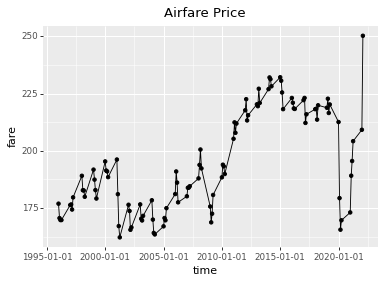

<ggplot: (8739155570661)>

In [7]:
from plotnine import ggplot, aes, ggtitle, geom_line, geom_point, theme

(ggplot(quarter_trend, aes('time', 'fare'))) + geom_point() + geom_line() \
+ ggtitle("Airfare Price") + theme(figure_size = (10,5))


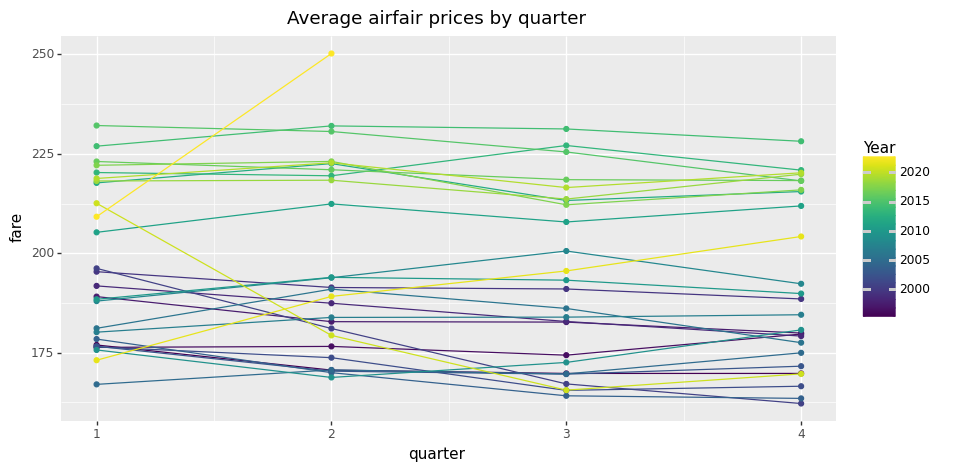

<ggplot: (8739153366441)>

In [8]:
ggplot(quarter_trend, aes('quarter', 'fare', group = 'Year')) + \
  ggtitle("Average airfair prices by quarter") + \
  geom_line(aes(color = 'Year')) + geom_point(aes(color = 'Year')) + theme(figure_size = (10,5))

We can see that there is a slight seasonality in the price. The airfair is slightly lower in the later 2 quarters. Now we find that `quarter` affects the price a little bit, but not significant.

Just try to deseasonalize the data to give a overall trend of the price

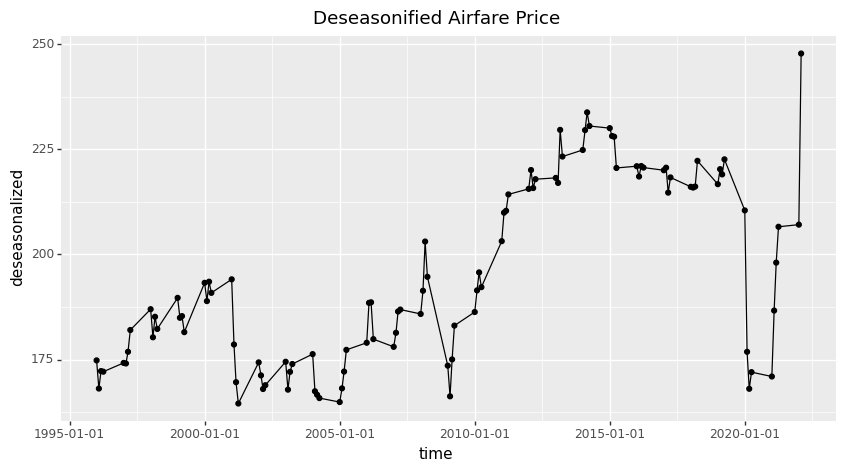

<ggplot: (8739153318132)>

In [9]:
model = smf.ols('fare ~ C(quarter)', data = quarter_trend).fit()
quarter_trend['deseasonalized'] = model.resid + np.mean(quarter_trend['fare'])
ggplot(quarter_trend, aes('time', 'deseasonalized')) + geom_point() + geom_line() + ggtitle("Deseasonified Airfare Price") + theme(figure_size = (10, 5))

# 2. What factors influence the airfair?

In [10]:
df.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,table_1_flag,Geocoded_City1,Geocoded_City2
0,2009,2,32467,34576,"Miami, FL (Metropolitan Area)","Rochester, NY",1204,203,151.46,FL,0.29,131.05,FL,0.29,131.05,1,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","Rochester, NY\n(43.155708, -77.612547)"
1,2000,4,30397,33198,"Atlanta, GA (Metropolitan Area)","Kansas City, MO",692,782,172.83,DL,0.63,194.71,NJ,0.26,126.88,1,"Atlanta, GA (Metropolitan Area)\n(33.748547, -...","Kansas City, MO\n(39.099792, -94.578559)"
2,2007,4,32575,34614,"Los Angeles, CA (Metropolitan Area)","Salt Lake City, UT",590,3122,135.24,DL,0.51,144.28,B6,0.15,111.68,1,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","Salt Lake City, UT\n(40.758478, -111.888142)"
3,2004,4,32337,31650,"Indianapolis, IN","Minneapolis/St. Paul, MN",503,395,206.78,NW,0.74,224.77,TZ,0.11,156.74,1,"Indianapolis, IN\n(39.76845, -86.156212)","Minneapolis/St. Paul, MN\n(44.977479, -93.264346)"
4,2008,4,30194,30559,"Dallas/Fort Worth, TX","Seattle, WA",1670,957,242.74,AA,0.47,262.43,AS,0.27,218.90,1,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Seattle, WA\n(47.603229, -122.33028)"


We suspect that multiple factors can infuence the airfair. In this table, we have `city pair (potentially population)`, `nsmile`, `passengers`, `carriers` as factors. We first analyze the relationships between then and then do a PCA. This part will serves as feature engineering for the price prediction part.

##### 2.1 Transform city pairs to quantified data.

In order to do this, we analyze the most popular city pairs.

If we do not consider year and quarter, just sum up all record.

In [11]:
df.groupby(by = ['city1', 'city2'])['passengers'].agg(sum).sort_values(ascending = False)

city1                                  city2                                
Los Angeles, CA (Metropolitan Area)    San Francisco, CA (Metropolitan Area)    1963508
Miami, FL (Metropolitan Area)          New York City, NY (Metropolitan Area)    1434608
Los Angeles, CA (Metropolitan Area)    New York City, NY (Metropolitan Area)    1052788
New York City, NY (Metropolitan Area)  Orlando, FL                               927140
Chicago, IL                            New York City, NY (Metropolitan Area)     922648
                                                                                 ...   
Columbia, SC                           Los Angeles, CA (Metropolitan Area)           29
Columbus, OH                           Punta Gorda, FL                               28
Dallas/Fort Worth, TX                  Fort Wayne, IN                                28
Charleston, SC                         Kansas City, MO                               28
Belleville, IL                         Tamp

What if we just consider the average of each quarter?

In [12]:
df.groupby(by = ['city1', 'city2'])['passengers'].agg(np.average).sort_values(ascending = False)

city1                                  city2                                
Los Angeles, CA (Metropolitan Area)    San Francisco, CA (Metropolitan Area)    18523.660377
Miami, FL (Metropolitan Area)          New York City, NY (Metropolitan Area)    13534.037736
Los Angeles, CA (Metropolitan Area)    New York City, NY (Metropolitan Area)     9931.962264
New York City, NY (Metropolitan Area)  Orlando, FL                               8746.603774
Chicago, IL                            New York City, NY (Metropolitan Area)     8704.226415
                                                                                    ...     
Columbia, SC                           Los Angeles, CA (Metropolitan Area)         29.000000
Dallas/Fort Worth, TX                  Fort Wayne, IN                              28.000000
Columbus, OH                           Punta Gorda, FL                             28.000000
Charleston, SC                         Kansas City, MO                             28.

What if we consider the average of each year?

In [13]:
year_avg = df.groupby(by = ['city1' , 'city2', 'Year'])[['passengers']].agg(np.average)
year_avg = year_avg.reset_index()
year_avg = year_avg.groupby(by = ['city1', 'city2'])[['passengers']].agg(np.average)
year_avg.sort_values(by = 'passengers', ascending = False)

,,passengers
city1,city2,
"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",18441.574074
"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",13618.898148
"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",9959.111111
"New York City, NY (Metropolitan Area)","Orlando, FL",8791.666667
"Chicago, IL","New York City, NY (Metropolitan Area)",8685.314815
...,...,...
"Columbia, SC","Los Angeles, CA (Metropolitan Area)",29.000000
"Dallas/Fort Worth, TX","Fort Wayne, IN",28.000000
"Belleville, IL","Tampa, FL (Metropolitan Area)",28.000000


We see that different evaluation matrics basically give the same result. By combining with the city sizes, we can believe that the city size has a positive relationship with the number of passengers.

In order to verify this, we can do: sum the year avg of city pair, and then do a linear regression.

In [14]:
import re
df_city_passenger = year_avg.reset_index()
subdf1 = df_city_passenger[['city1', 'passengers']]
subdf1.columns = ['city','passengers']
subdf2 = df_city_passenger[['city2', 'passengers']]
subdf2.columns = ['city','passengers']
combined = pd.concat((subdf1, subdf2), axis = 0, ignore_index = True)
df_city_passenger = combined.groupby('city')[['passengers']].agg(sum).reset_index()
df_city_passenger['city'] = df_city_passenger['city'].apply(lambda x: re.findall(pattern = r'[a-zA-Z ]+, [A-Z]{2}', string = x)[0])
df_city_passenger

,city,passengers
0,"Albany, NY",4344.944446
1,"Albuquerque, NM",9768.905953
2,"Easton, PA",890.584493
3,"Amarillo, TX",974.153030
4,"Appleton, WI",654.666667
...,...,...
171,"Washington, DC",85725.758034
172,"Palm Beach, FL",13377.895926
173,"Wichita, KS",1739.513962
174,"Wilmington, DE",182.000000


read in the population lookup table

In [15]:
pop_table = pd.read_csv('us2021census.csv')[['City', 'State', 'Population']]
pop_table['City'] = pop_table.apply(lambda x: x[0] + ', ' + x[1], axis = 1)
pop_table[['City', 'Population']]

,City,Population
0,"New York, NY",8804190
1,"Los Angeles, CA",3898747
2,"Chicago, IL",2746388
3,"Houston, TX",2304580
4,"Phoenix, AZ",1608139
...,...,...
21392,"Hoot Owl, OK",0
21393,"Lakeside, MO",0
21394,"Mustang, TX",0
21395,"South Park View, KY",0


In [16]:
passenger_pop = pd.merge(left = df_city_passenger, right = pop_table[['City', 'Population']], left_on = 'city', right_on = 'City', how = 'inner')[['passengers', 'Population']]

We are now able to plot and do a linear regression.

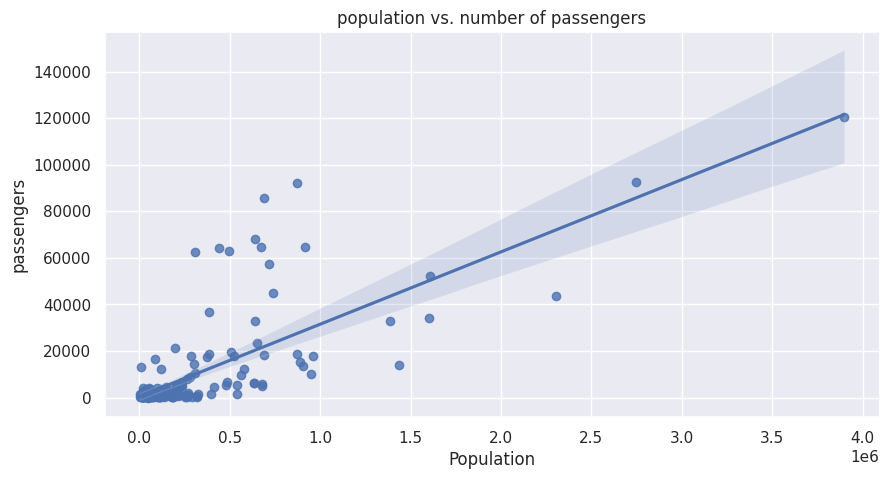

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(10,5)})
plot = sns.regplot(data = passenger_pop, y = 'passengers', x = 'Population').set(title = 'population vs. number of passengers')
plt.savefig('population_vs_passengers.png', dpi = 120)

In [18]:
passenger_pop.corr()

,passengers,Population
passengers,1.000000,0.742772
Population,0.742772,1.000000


In [19]:
model1 = smf.ols('passengers ~ Population', data = passenger_pop).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             passengers   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.98e-31
Time:                        18:16:00   Log-Likelihood:                -1878.2
No. Observations:                 172   AIC:                             3760.
Df Residuals:                     170   BIC:                             3767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    493.8383   1208.894      0.409      0.683   -1892.538    2880.214
Population     0.0310      0.002     14.464      0.000       0.027       0.035
==============================================================================
Omnibus:                      120.179   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.134
Skew:                           2.680   Prob(JB):                    2.69e-177
Kurtosis:                      12.205   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can thus believe that larger population leads to a larger passenger cardinal number.

So we can transform city pairs to corresponding sum of populations, which makes categorical data quantified. And the data can be further fed into the machine learning model. We just add the sum_population here.

In [20]:
df['city1'] = df['city1'].apply(lambda x: re.findall(pattern = r'[a-zA-Z ]+, [A-Z]{2}', string = x)[0])
df['city2'] = df['city2'].apply(lambda x: re.findall(pattern = r'[a-zA-Z ]+, [A-Z]{2}', string = x)[0])

In [21]:
pop1 = pd.merge(left = df, right = pop_table, left_on = 'city1', right_on = 'City', how = "left")
pop2 = pd.merge(left = pop1, right = pop_table, left_on = 'city2', right_on = 'City', how = "left")
data = pop2[['quarter', 'city1', 'city2', 'nsmiles', 'passengers', 'fare', 'large_ms', 'lf_ms', 'Population_x', 'Population_y']].dropna(axis = 0)

In [22]:
data['sum_pop'] = data.apply(lambda x: x[7] + x[8], axis = 1)
data.corr()

,quarter,nsmiles,passengers,fare,large_ms,lf_ms,Population_x,Population_y,sum_pop
quarter,1.000000,0.004199,0.013260,-0.026794,-0.014028,-0.012521,0.012035,0.006753,0.012035
nsmiles,0.004199,1.000000,-0.032295,0.552863,-0.500374,-0.304720,0.037634,0.177107,0.037634
passengers,0.013260,-0.032295,1.000000,-0.107797,-0.100909,-0.065055,0.258476,0.137866,0.258476
fare,-0.026794,0.552863,-0.107797,1.000000,-0.211382,-0.353986,0.078468,0.165187,0.078468
large_ms,-0.014028,-0.500374,-0.100909,-0.211382,1.000000,0.337070,-0.154720,-0.149582,-0.154720
lf_ms,-0.012521,-0.304720,-0.065055,-0.353986,0.337070,1.000000,-0.057958,-0.098009,-0.057958
Population_x,0.012035,0.037634,0.258476,0.078468,-0.154720,-0.057958,1.000000,-0.129417,1.000000
Population_y,0.006753,0.177107,0.137866,0.165187,-0.149582,-0.098009,-0.129417,1.000000,-0.129417
sum_pop,0.012035,0.037634,0.258476,0.078468,-0.154720,-0.057958,1.000000,-0.129417,1.000000


Also, we want to see whether a balanced market gives a lower airfare. A balanced market means that the large_ms is small.

Now we can do PCA to find some useful information about what factors can affect the airfair.

In [23]:
# one hot encoding quarter
data['quarter'] = data['quarter'].astype(str)
data = pd.get_dummies(data, columns = ['quarter'])
data

,city1,city2,nsmiles,passengers,fare,large_ms,lf_ms,Population_x,Population_y,sum_pop,quarter_1,quarter_2,quarter_3,quarter_4
0,"Miami, FL","Rochester, NY",1204,203,151.46,0.2900,0.2900,442241.0,211328.0,4.422413e+05,0,1,0,0
1,"Atlanta, GA","Kansas City, MO",692,782,172.83,0.6300,0.2600,498715.0,508090.0,4.987153e+05,0,0,0,1
2,"Los Angeles, CA","Salt Lake City, UT",590,3122,135.24,0.5100,0.1500,3898747.0,199723.0,3.898747e+06,0,0,0,1
4,"Fort Worth, TX","Seattle, WA",1670,957,242.74,0.4700,0.2700,918915.0,737015.0,9.189153e+05,0,0,0,1
6,"Los Angeles, CA","Memphis, TN",1619,340,246.90,0.3200,0.2100,3898747.0,633104.0,3.898747e+06,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107177,"Syracuse, NY","Tampa, FL",1111,314,184.49,0.3926,0.3926,148620.0,384959.0,1.486204e+05,0,1,0,0
107178,"Knoxville, TN","Washington, DC",465,250,241.80,0.7095,0.7095,190740.0,689545.0,1.907407e+05,0,1,0,0
107180,"Knoxville, TN","Miami, FL",724,302,179.62,0.6263,0.6263,190740.0,442241.0,1.907406e+05,0,1,0,0
107181,"Knoxville, TN","Tampa, FL",550,267,133.90,0.8132,0.8132,190740.0,384959.0,1.907408e+05,0,1,0,0


In [24]:
import sklearn.decomposition as skd
pca_model = skd.PCA().fit(data.iloc[:, [2, 3, 5, 6, 9]])

In [25]:
pca_model.components_

array([[ 2.60422941e-05,  3.19181859e-04, -3.27264101e-08,
        -1.59371711e-08,  9.99999949e-01],
       [-3.79239086e-02,  9.99280579e-01, -9.23567042e-06,
        -1.03960245e-05, -3.17964624e-04],
       [ 9.99280610e-01,  3.79238949e-02, -1.52971605e-04,
        -1.21999322e-04, -3.81281877e-05],
       [ 1.56204722e-04,  1.83345094e-05,  2.53459537e-01,
         9.67345976e-01,  1.37916077e-08],
       [ 1.16731483e-04,  1.07337598e-05,  9.67345977e-01,
        -2.53459557e-01,  2.11523569e-08]])

In [26]:
pca_model.explained_variance_

array([7.93920274e+11, 1.13082854e+06, 3.78556600e+05, 5.61623283e-02,
       2.36255142e-02])

Text(0.5, 1.0, 'Scree Plot')

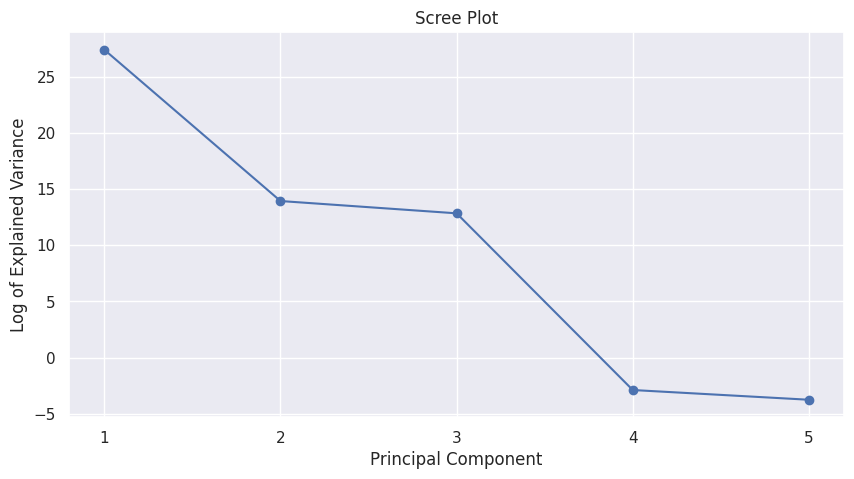

In [33]:
# A "scree" plot.
import matplotlib.pyplot as plt
plt.plot(range(1,6),np.log(pca_model.explained_variance_),'b-o')
plt.xlabel('Principal Component')
plt.xticks(range(1,6))
plt.ylabel('Log of Explained Variance')
plt.title('Scree Plot')

# 3. Predict the airfare

In [30]:
# build a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 0)

# divide the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [2, 3, 5, 6, 9]], data['fare'], test_size = 0.2, random_state = 0)

# fit the model
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)



2098.2506446695775

In [36]:
# divide the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [2, 3, 5, 6, 9]], data['fare'], test_size = 0.2, random_state = 0)

# build a random forest regressor with 5 fold cross validation on depth
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1)
param_grid = {'max_depth': [ 20, 25, 30, 35, 40, 45, 50]}
grid_search = GridSearchCV(rf, param_grid, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

# predict the test data
y_pred = grid_search.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .......................................max_depth=20; total time=   4.2s
[CV] END .......................................max_depth=20; total time=   4.8s
[CV] END .......................................max_depth=20; total time=   5.7s
[CV] END .......................................max_depth=20; total time=   5.8s
[CV] END .......................................max_depth=20; total time=   5.7s
[CV] END .......................................max_depth=25; total time=   6.2s
[CV] END .......................................max_depth=25; total time=   6.2s
[CV] END .......................................max_depth=25; total time=   6.2s
[CV] END .......................................max_depth=25; total time=   6.2s
[CV] END .......................................max_depth=25; total time=   6.2s
[CV] END .......................................max_depth=30; total time=   6.4s
[CV] END .......................................m

803.6533864973105

In [37]:
# for each test point, calculate the percertage loss
y_test = np.array(y_test)
y_pred = np.array(y_pred)
loss = np.abs(y_test - y_pred) / y_test
np.median(loss)

0.0846928092782216

In [34]:
# divide the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, [2, 3, 9]], data['fare'], test_size = 0.2, random_state = 0)

# build a random forest regressor with 5 fold cross validation on depth
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1)
param_grid = {'max_depth': [ 20, 25, 30, 35, 40, 45, 50]}
grid_search = GridSearchCV(rf, param_grid, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

# predict the test data
y_pred = grid_search.predict(X_test)

# calculate the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .......................................max_depth=20; total time=   4.1s
[CV] END .......................................max_depth=20; total time=   3.1s
[CV] END .......................................max_depth=20; total time=   4.6s
[CV] END .......................................max_depth=20; total time=   4.7s
[CV] END .......................................max_depth=20; total time=   4.3s
[CV] END .......................................max_depth=25; total time=   4.4s
[CV] END .......................................max_depth=25; total time=   4.2s
[CV] END .......................................max_depth=25; total time=   4.1s
[CV] END .......................................max_depth=25; total time=   4.1s
[CV] END .......................................max_depth=25; total time=   4.2s
[CV] END .......................................max_depth=30; total time=   4.5s
[CV] END .......................................m

897.5985276174998

In [35]:
# for each test point, calculate the percertage loss
y_test = np.array(y_test)
y_pred = np.array(y_pred)
loss = np.abs(y_test - y_pred) / y_test
np.median(loss)

0.09147331908052617

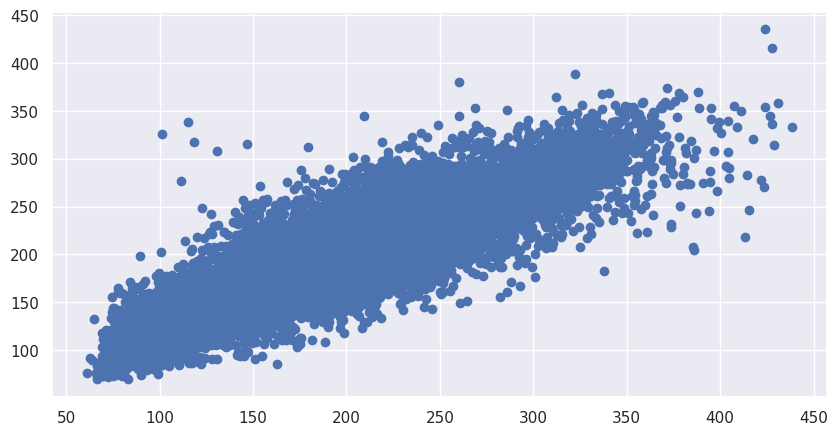

In [38]:
# plot the predicted fare vs. actual fare
plt.scatter(y_test, y_pred)
plt.xlabel('actual fare')
plt.ylabel('predicted fare')
plt.title('predicted fare vs. actual fare')